<a href="https://colab.research.google.com/github/DABallentine/knowledge_discovery_charlotte/blob/Kevin/311_Calls_Analysis_10_15_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovering Knowledge for the City of Charlotte, NC
This project is a course requirement for DSBA-6162, Knowledge Discovery in Databases, at UNCC for the Fall semester, 2021.

<b>Team Members:</b> <br>
Naomi Thammadi <br>
Kevin Gharavizadeh <br>
Imad Ahmad <br>
Dustin Ballentine <br>

<h2> Project Motivation </h2>
The city of Charlotte has, like many cities, made large volumes of data open to the public in an online repository. This open data provides substantial potential for the city to benefit from knowledge discovery and insights generated by members of the public, such as ourselves. Service requests dialed to 311 represent a large opportunity to delve into the needs of the population and potentially extract useful trends that could allow the city to improve its service to its citizens. The goal of this project is to explore and uncover exactly those trends in the hope that the knowledge we discover may be used by the city to improve the quality of life of our families, friends, and neighbors.

<h2> Research Question(s) </h2>
<b>Do different areas within the city of Charlotte experience higher recurrence of any type of 311 service request than other areas, and do those areas correlate with red-line districts or other known demographic or socioeconomic profiles?</b>

<h2> Data Resources </h2>

<a href="https://data.charlottenc.gov/datasets/charlotte::service-requests-311/about"> 311 Service Requests </a> retrieved 30 September, 2021. 

<a href= "https://data.charlottenc.gov/datasets/census-household-income-block-groups/explore?location=35.259200%2C-80.807850%2C10.90"> Household Income </a> retrieved 12 October, 2021. 

<h2> Data Survey </h2>

In [2]:
#install packages, and download a few new ones 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')

import descartes

!pip install geopandas 
import geopandas as gpd

from shapely.geometry import Point, Polygon

%matplotlib inline

     |████████████████████████████████| 1.0 MB 7.1 MB/s 
     |████████████████████████████████| 6.3 MB 49.4 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 


In [3]:
#mount and connect my drive to access data files 

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
#311 CSV file 
requests = pd.read_csv('/content/gdrive/MyDrive/Data/Service_Requests_311.csv')


In [26]:
#SHP visual basemap file 
charlotte_map = gpd.read_file('/content/gdrive/MyDrive/Data/mecklenburgcounty_boundary/MecklenburgCounty_Boundary.shp')

In [27]:
#SHP Visual with zipcode boundaries 
charlotte_zipcode_map = gpd.read_file('/content/gdrive/MyDrive/Data/zipcode/Zipcode.shp')

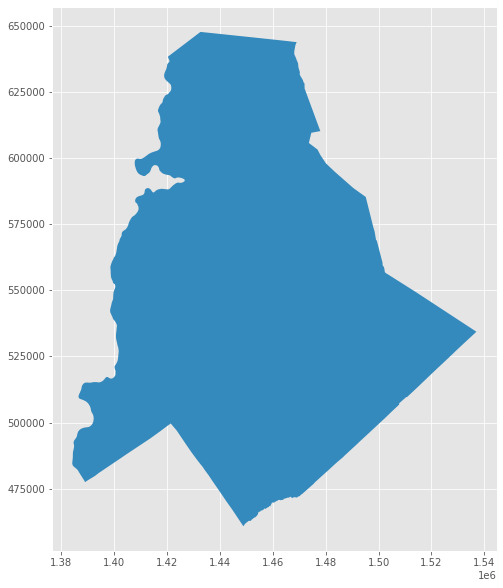

In [28]:
fig, ax = plt.subplots(figsize = (10,10))
charlotte_map.plot(ax= ax)

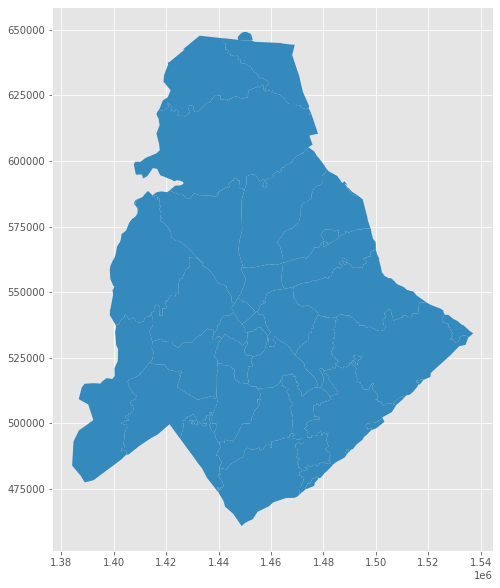

In [29]:
#This map seems better. Perhaps we can get it to change the colors for each zone 

fig, ax = plt.subplots(figsize = (10,10))
charlotte_zipcode_map.plot(ax= ax)

In [9]:
#Not sure what the CRS does exactly. An authority string (i.e. “epsg:4326”) or it changes some sort of format. 
#We need to convert our pandas dataframe into a "geo dataframe"
crs= {'init': 'epsg:4326'}
requests.head()

,X,Y,OBJECTID,DEPARTMENT,DIVISION,REQUEST_NO,FISCAL_YEAR,FISCAL_MONTH,REQUEST_TYPE,RECEIVED_DATE,INTERNAL_FIELD_OBSERVATION,TITLE,CMPD_DIVISION,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,STREET_DIRECTION,STREET_NAME,STREET_TYPE,CITY,STATE,ZIP_CODE,FULL_ADDRESS,X_COORD,Y_COORD,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,GlobalID,PID,Shape
0,1.458251e+06,508075.000119,1,Solid Waste Services,Sanitation,6402056,2017,05-Nov,NON_RECYCLABLE ITEMS,2016/11/07 14:25:00+00,N,NON_RECYCLABLE ITEMS,NaN,215.0,3601.0,NaN,KNAPDALE,LN,CHARLOTTE,NC,28226.0,"3601 KNAPDALE LN, CHARLOTTE, NC 28226",1458251.0,508075.0,35.132444,-80.812089,NaN,{35439C7B-D8E4-4296-9119-8673B1D5A7C8},20904304,NaN
1,1.468687e+06,587225.999953,2,Housing and NBHD Serv,311 Partner Liaison,6402064,2017,05-Nov,UTILITY VERIFICATION LTR,2016/11/07 14:28:00+00,N,UTILITY VERIFICATION LTR,NaN,265.0,4124.0,NaN,SILVERMERE,WY,CHARLOTTE,NC,28269.0,"4124 SILVERMERE WY, CHARLOTTE, NC 28269",1468687.0,587226.0,35.350408,-80.781941,NaN,{3B4A2DC0-8886-4E8E-95E6-4F426C4E08E2},02731251,NaN
2,1.471481e+06,562512.999839,3,Solid Waste Services,Sanitation,6402082,2017,05-Nov,NON_RECYCLABLE ITEMS,2016/11/07 14:34:00+00,N,Non-recyclable Items,NaN,103.0,523.0,NaN,GRAHAM MEADOW,DR,CHARLOTTE,NC,28213.0,"523 GRAHAM MEADOW DR, CHARLOTTE, NC 28213",1471481.0,562513.0,35.282654,-80.771094,NaN,{C3E4CF76-7630-4356-8216-428445A0903F},08917486,NaN
3,1.438992e+06,568604.000124,4,Solid Waste Services,Sanitation,6402103,2017,05-Nov,MISSED RECYCLING,2016/11/07 14:41:00+00,N,MISSED RECYCLING,NaN,158.0,1801.0,NaN,CRANDON,DR,CHARLOTTE,NC,28216.0,"1801 CRANDON DR, CHARLOTTE, NC 28216",1438992.0,568604.0,35.297745,-80.880327,NaN,{FC3B4CD8-1131-42B4-A37E-8CA448855B24},03925515,NaN
4,NaN,NaN,5,Transit,Transit/Operations,6402111,2017,05-Nov,CITIZEN FEEDBACK,2016/11/07 14:44:00+00,N,CITIZEN FEEDBACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{E0166346-2381-40E1-80A0-2ECA4FB6CB27},NaN,NaN


In [ ]:
#we now need to create "points", points describe out long and lat into a data point. 
#make sure to always specify longitude column before lat

In [12]:
geometry = [Point(xy) for xy in zip(requests['LONGITUDE'], requests['LATITUDE'])]
geometry[:3]

#Printing the :3 if I'm not mistaken to now have a point, followed long and lat for each location?? Do more research on this 

In [13]:
#make a new dataframe to include all of our new information 
geo_requests = gpd.GeoDataFrame(requests, #specificy the original dataset 
                                crs= crs, #Specify our coordinate reference system
                                geometry= geometry) # specifies the geometry list we made 

geo_requests.head()

#Now that we have our geometry column, we can drop our lat and long column if we want to, geo dataframes automatically request the geometry column 

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,X,Y,OBJECTID,DEPARTMENT,DIVISION,REQUEST_NO,FISCAL_YEAR,FISCAL_MONTH,REQUEST_TYPE,RECEIVED_DATE,INTERNAL_FIELD_OBSERVATION,TITLE,CMPD_DIVISION,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,STREET_DIRECTION,STREET_NAME,STREET_TYPE,CITY,STATE,ZIP_CODE,FULL_ADDRESS,X_COORD,Y_COORD,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,GlobalID,PID,Shape,geometry
0,1.458251e+06,508075.000119,1,Solid Waste Services,Sanitation,6402056,2017,05-Nov,NON_RECYCLABLE ITEMS,2016/11/07 14:25:00+00,N,NON_RECYCLABLE ITEMS,NaN,215.0,3601.0,NaN,KNAPDALE,LN,CHARLOTTE,NC,28226.0,"3601 KNAPDALE LN, CHARLOTTE, NC 28226",1458251.0,508075.0,35.132444,-80.812089,NaN,{35439C7B-D8E4-4296-9119-8673B1D5A7C8},20904304,NaN,POINT (-80.81209 35.13244)
1,1.468687e+06,587225.999953,2,Housing and NBHD Serv,311 Partner Liaison,6402064,2017,05-Nov,UTILITY VERIFICATION LTR,2016/11/07 14:28:00+00,N,UTILITY VERIFICATION LTR,NaN,265.0,4124.0,NaN,SILVERMERE,WY,CHARLOTTE,NC,28269.0,"4124 SILVERMERE WY, CHARLOTTE, NC 28269",1468687.0,587226.0,35.350408,-80.781941,NaN,{3B4A2DC0-8886-4E8E-95E6-4F426C4E08E2},02731251,NaN,POINT (-80.78194 35.35041)
2,1.471481e+06,562512.999839,3,Solid Waste Services,Sanitation,6402082,2017,05-Nov,NON_RECYCLABLE ITEMS,2016/11/07 14:34:00+00,N,Non-recyclable Items,NaN,103.0,523.0,NaN,GRAHAM MEADOW,DR,CHARLOTTE,NC,28213.0,"523 GRAHAM MEADOW DR, CHARLOTTE, NC 28213",1471481.0,562513.0,35.282654,-80.771094,NaN,{C3E4CF76-7630-4356-8216-428445A0903F},08917486,NaN,POINT (-80.77109 35.28265)
3,1.438992e+06,568604.000124,4,Solid Waste Services,Sanitation,6402103,2017,05-Nov,MISSED RECYCLING,2016/11/07 14:41:00+00,N,MISSED RECYCLING,NaN,158.0,1801.0,NaN,CRANDON,DR,CHARLOTTE,NC,28216.0,"1801 CRANDON DR, CHARLOTTE, NC 28216",1438992.0,568604.0,35.297745,-80.880327,NaN,{FC3B4CD8-1131-42B4-A37E-8CA448855B24},03925515,NaN,POINT (-80.88033 35.29775)
4,NaN,NaN,5,Transit,Transit/Operations,6402111,2017,05-Nov,CITIZEN FEEDBACK,2016/11/07 14:44:00+00,N,CITIZEN FEEDBACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{E0166346-2381-40E1-80A0-2ECA4FB6CB27},NaN,NaN,POINT (nan nan)


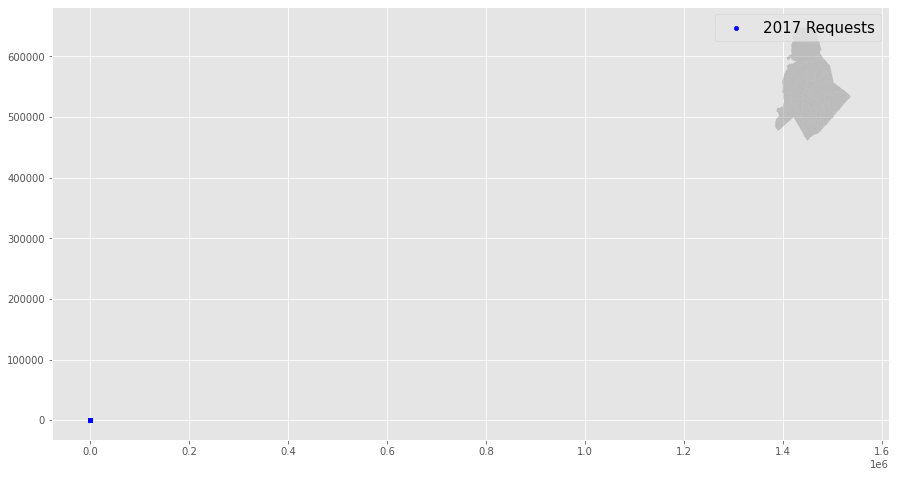

In [38]:
#now let's try to plot the map and see if we get any points on there 

fig,ax = plt.subplots(figsize = (15,15))
charlotte_zipcode_map.plot(ax= ax, alpha =0.4, color ='grey')
geo_requests[geo_requests['FISCAL_YEAR'] == 2017].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = '2017 Requests')
plt.legend(prop={'size': 15})

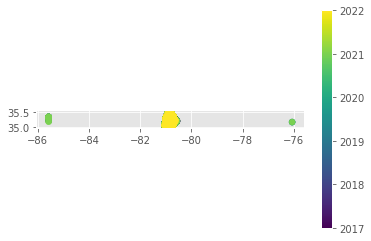

In [23]:
geo_requests.plot('FISCAL_YEAR', legend=True)

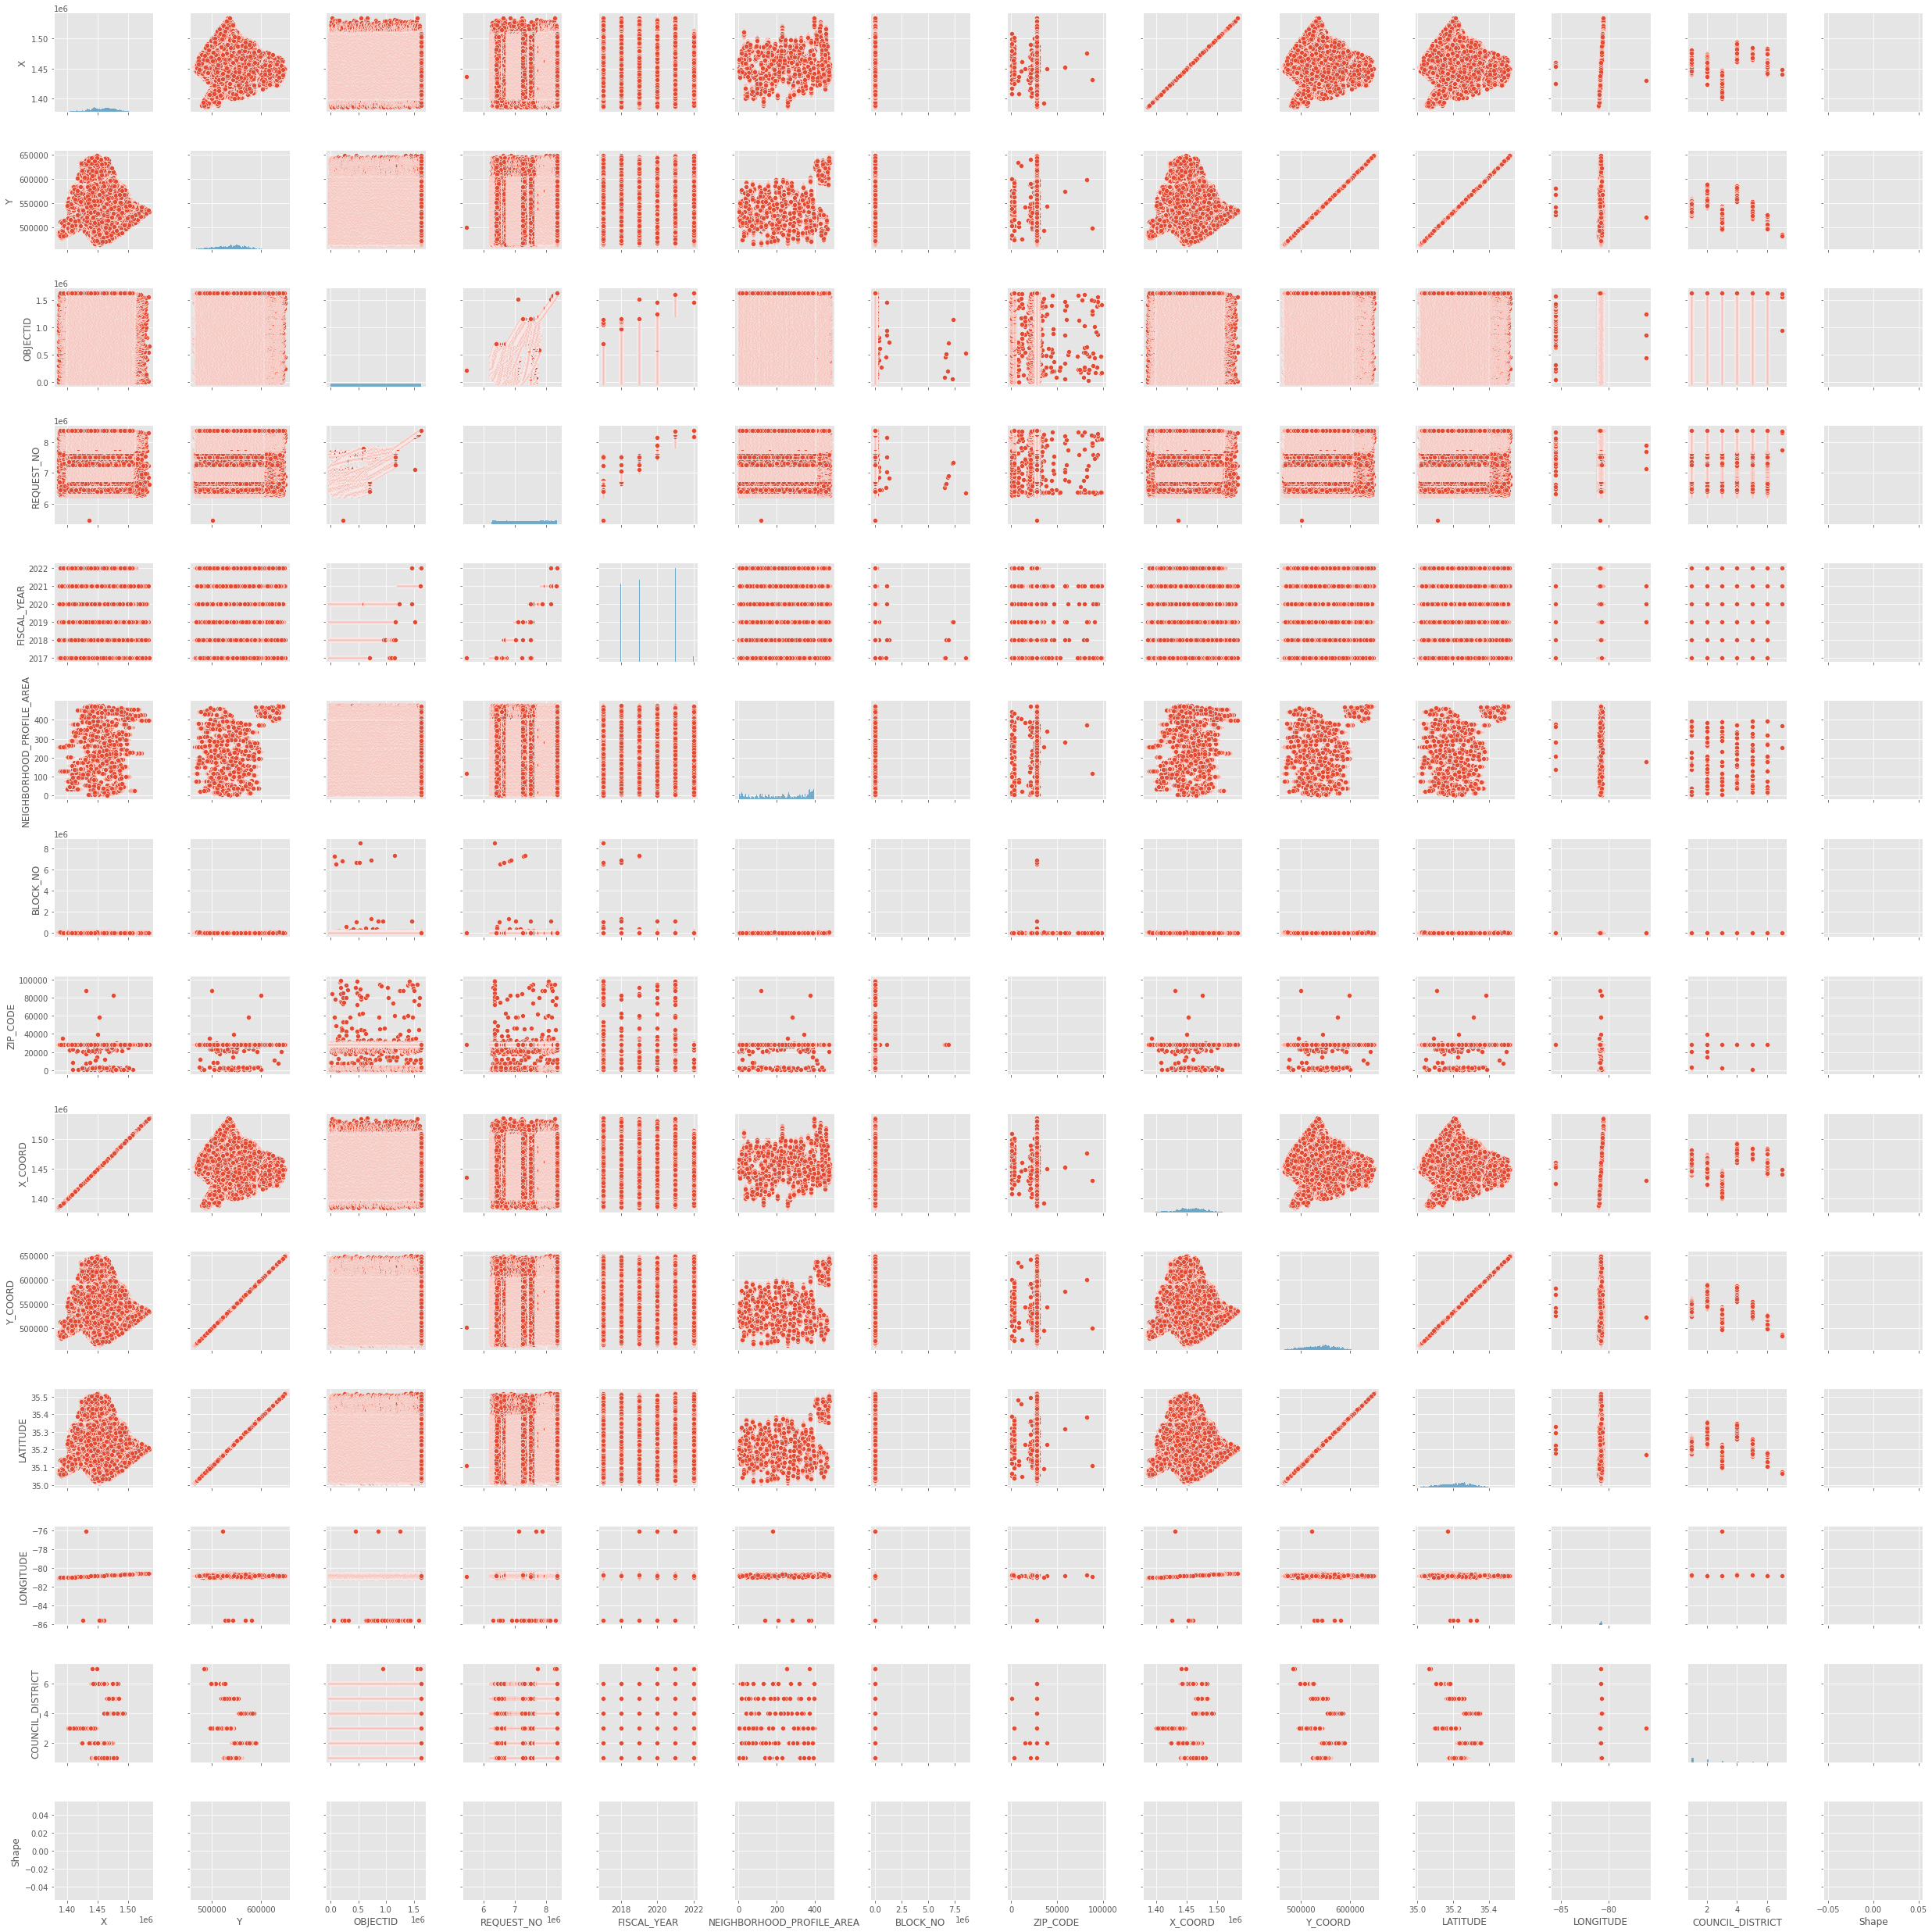

In [30]:
sns.pairplot(requests)

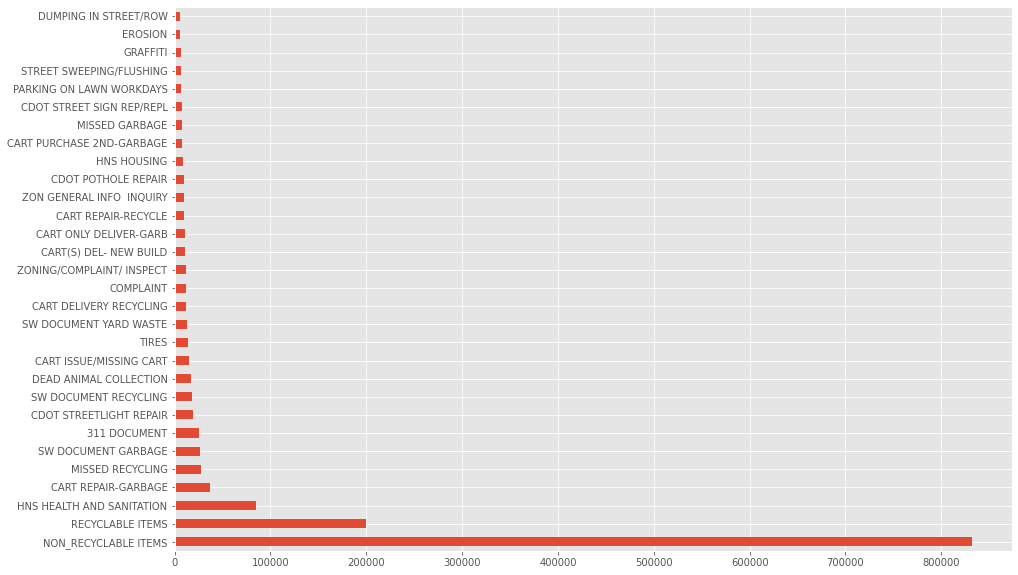

In [37]:
requests['REQUEST_TYPE'].value_counts().head(30).plot(kind='barh', figsize=(15,10))

In [36]:
request_type_count = requests['REQUEST_TYPE'].count()
print(request_type_count)

request_type_count.plot.hist()

1631510


AttributeError: ignored

In [ ]:
print("Records:", requests.shape[0], "\n", "Features:", requests.shape[1], "\n")
print(requests.info())

In [ ]:
requests['REQUEST_TYPE'].value_counts().head(20)

<h2> Data Preprocessing </h2>

<h2> Data Understanding and Exploration </h2>

<h2> Data Preparation for Modeling </h2>

<h2> Modeling </h2>

<h2> Evaluation </h2>

<h2> Results </h2>